In [3]:
import csv
import pandas as pd
import networkx as nx
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

In [1]:
# path to files
path_uber_raw = "uber-trip-data/uber-raw-data-apr14.csv"

In [2]:
data = pd.read_csv(path_uber_raw)

NameError: name 'pd' is not defined

In [4]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [83]:
# create network graph and initialize nodes based on grid size 
def createDiGraph(data, size, sample_size, draw=True):
    G = nx.DiGraph(); 
    grid_size = size
    for i in range(grid_size):
        for j in range(grid_size):
            G.add_node(i*grid_size + j)

    lat = data['Lat']
    lon = data['Lon']
    
    # divide geographical data into equal grid chunks
    range_lat = max(lat) - min(lat)
    range_lon = max(lon) - min(lon)
    lat_interval = range_lat / grid_size
    lon_interval = range_lon / grid_size
    num_points = sample_size

    # split up data 
    for pick_up in range(num_points):
        # get 2D grid index from location data
        this_lat = data['Lat'][pick_up]
        this_lon = data['Lon'][pick_up]
        lat_grid = math.floor((this_lat - min(lat)) / lat_interval)
        lon_grid = math.floor((this_lon - min(lon)) / lon_interval)

        # convert 2D indices to 1D node index between src and (randomized) dest
        src = lat_grid*grid_size + lon_grid 
        dest = random.randint(0, grid_size*grid_size - 1)
        if (dest == src and src != 0):
            dest = 0

        # increase edge weight from src -->  dest by 1 
        if (G.has_edge(src, dest)):
            G[src][dest]['weight'] += 1
        else:
            G.add_edge(src, dest, weight=1)
        
        #print("Adding edge from " + str(src) + " to " + str(dest))
    return G 

In [108]:
# visualize graph with matplotlib
# convert 1D node indices to 2D graph coordinates
def drawGraph(G, grid_size):
    pos_2d = [(x % grid_size, math.floor(x/grid_size), ) for x in range(grid_size*grid_size)]
    pos = dict(zip(range(grid_size*grid_size), pos_2d))
    nx.draw(G, pos)
    labels = nx.get_edge_attributes(G,'weight')

In [109]:
grid_size = 10
G = createDiGraph(data, grid_size, 100)

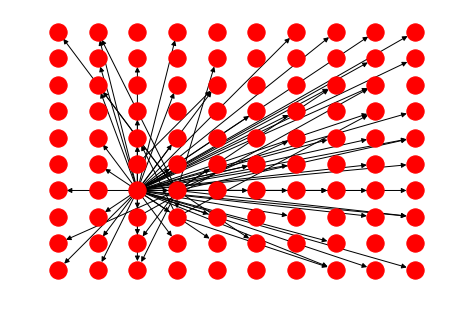

In [110]:
drawGraph(G, grid_size)

Now that we have a general sense of how to create a networkx graph with a small subsample of data using a fixed grid size, we want to cluster the lat/long. coordinates into more geographically meaningful regions. 

### Geographical Clustering

In [77]:
# generate histogram for lat/long. coordinates to see the spread 
def plotHist(x, bin_size, title):
    bins = np.linspace(min(x), 
                       max(x),
                       bin_size) # fixed number of bins
    plt.xlim([min(x), max(x)])

    plt.hist(x, bins=bins, alpha=0.5)
    plt.title(title)
    plt.xlabel('variable X (' + str(bin_size) + ' evenly spaced bins)')
    plt.ylabel('count')

    plt.show()

In [13]:
# remove outliers 
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

#### compare the effects of removing outliers vs increasing grid size 

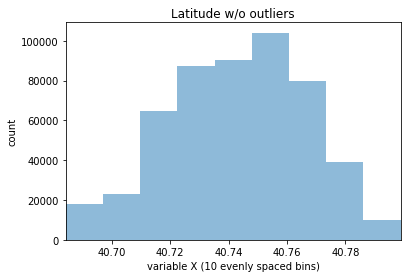

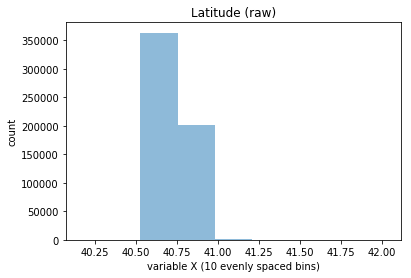

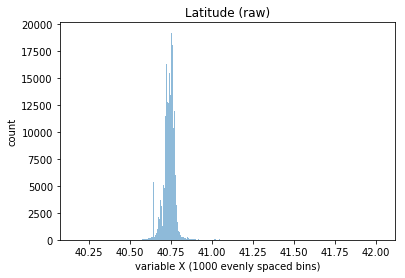

In [64]:
lat_strip = removeOutliers(lat, 1)
plotHist(lat_strip, 10, 'Latitude w/o outliers')
plotHist(lat, 10, 'Latitude (raw)')
plotHist(lat, 1000, 'Latitude (raw)')

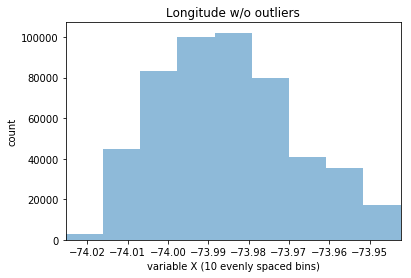

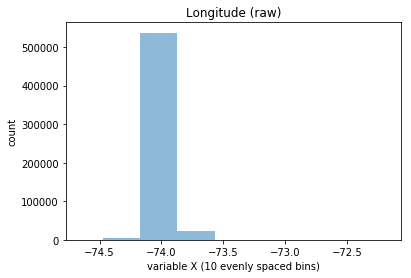

In [62]:
lon_strip = removeOutliers(lon, 1)
plotHist(lon_strip, 10, 'Longitude w/o outliers')
plotHist(lon, 10, 'Longitude (raw)')

#### k-means clustering

In [131]:
# plot pick-up data using k-means clustering
def plotKMeans(lat, long, k, iters):
    coordinates= np.array(list(zip(lat, long)))
    centroids, labels = kmeans2(whiten(coordinates), k, iter = iters)  
    plt.scatter(coordinates[:,0], coordinates[:,1], c=labels);
    plt.show()
    return centroids, labels

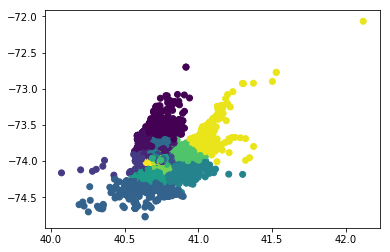

In [132]:
centroid, label = plotKMeans(data['Lat'], data['Lon'], 30, 20)

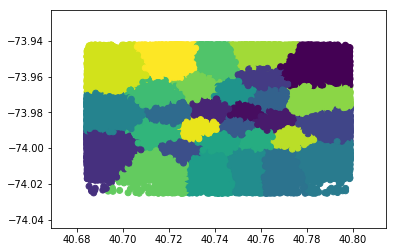

In [133]:
centroid_2, label_2 = plotKMeans(lat_strip, lon_strip, 30, 20)

k-means with outliers removed produces a decent-looking spread - but what does this mean with respect to actual NYC l